In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').hide();
  } else {
    $('div.input').show();
  }
  code_show = !code_show
}
$(document).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clique aqui para ativar/desativar o código bruto."></form>''')

# Análise dos dados dos discentes e cursos da UFRN
Iremos analisar os dados dos discentes e cursos da Universidade Federal do Rio Grande do Norte - UFRN, a fim de entendermos melhor os perfis de pessoas que entram nessa universidade.

Trabalho realizado por:
- <a href="https://github.com/alvarofpp">Álvaro Ferreira Pires de Paiva</a>
  - Matrícula: 2016039162
  - E-mail: alvarofepipa@gmail.com
- <a href="https://github.com/Iolch">Iolanda Chagas Costa Paiva</a>
  - Matrícula: 2016036509
  - E-mail: iccpaiva@gmail.com  

# Sumário
- [Base de Dados](#base-dados)
- [Código](#codigo)
  - [Dependências](#dependencias)
  - [Preparando os dados](#preparando-dados)
  - [Analises](#analises)
    - Classes sociais por período de matrícula
    - Análise das bolsas/auxílios
    - Alunos que recebem bolsa/auxílios no decorrer dos anos
    - Ingressos por áreas de conhecimento
    - Cursos por área de conhecimento

# <a id="base-dados">Base de Dados</a>
Os dados utilizados formam retirados do site de [dados abertos da UFRN](http://dados.ufrn.br/). Foram utilizados os seguintes conjuntos de dados:

- [Cursos de Graduação](http://dados.ufrn.br/dataset/cursos-de-graduacao)
- [Dados Sócio-Econômicos de Discentes](http://dados.ufrn.br/dataset/dados-socio-economicos-de-discentes)
- [Dados Complementares de Discentes](http://dados.ufrn.br/dataset/dados-complementares-de-discentes)
- [Discentes](http://dados.ufrn.br/dataset/discentes)

# <a id="codigo">Código</a>
Agora iremos para a parte em que tentaremos encontrar as respostas das [perguntas orientadoras](#perguntas-orientadoras).

## <a id="dependencias">Dependências</a>
Nessa seção, iremos declarar as dependências necessárias para o Jupyter Notebook executar corretamente, para isso iremos: declarar as variáveis globais que iremos utilizar, importar as libs necessárias e preparar os arquivos que temos para podermos utilizá-los nas seções seguintes.

- [os](https://docs.python.org/3/library/os.html)
- [re](https://docs.python.org/3/library/re.html)
- [Numpy](http://www.numpy.org/) as **np**
- [Pandas](https://pandas.pydata.org/) as **pd**
- [Matplotlib](https://matplotlib.org/) as **plt**

Comandos de terminal para instalar as dependências que não vem por padrão:
```sh
conda install -c conda-forge numpy
conda install -c conda-forge matplotlib
conda install -c conda-forge pandas
```

Primeiro iremos importar as bibliotecas/pacotes que iremos utilizar durante a execução desse notebook.

In [2]:
import re
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

## <a id="preparando-dados">Preparando os dados</a>
Agora iremos criar uma variável chamada **dfs** que conterá os dataframes com os dados socioeconômicos e complementares dos discentes da UFRN. Para isso, além das funções informadas logo a seguir, iremos criar uma função chamada **make_df** que gerará um único DataFrame a partir de uma lista de arquivos.

Funções que estamos usando:
- **[pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)**: Ler um arquivo [CSV](https://pt.wikipedia.org/wiki/Comma-separated_values) e gera um DataFrame a partir dele;
  - **sep**: Especifica um delimitador (`default=','`).
- **[pandas.concat](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)**: Concatena vários objetos pandas;
  - **ignore_index**: Ignora os indexs dos objetos pandas concatenados (`default=False`).
- **[re.compile](https://docs.python.org/3/library/re.html#re.compile)**: Compila uma expressão regular;
- **[re.search](https://docs.python.org/3/library/re.html#re.search)**: Busca por um padrão em uma string;
- **[filter](https://www.programiz.com/python-programming/methods/built-in/filter)**: Filtra cada um dos itens de um iterável usando uma função;
- **[list](https://www.tutorialspoint.com/python/list_list.htm)**: Pega uma sequência de valores e converte para uma lista.

Agora iremos criar uma variável chamada **dfs** que conterá os dataframes com os dados socioeconômicos e complementares dos discentes da UFRN.

In [3]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Arquivos da pasta de datasets
files = listdir('data')

# Filtro aplicado, lista de arquivos que satisfazem o regex
files_filter = {
    'socioeconomicos': list(filter(re.compile(r'dados-socio-economicos-20[0-9]{2}').search, files)),
    'ingressantes': list(filter(re.compile(r'discentes-20[0-9]{2}.csv').search, files))
}

# Variável com os dataframes que iremos usar
dfs = {
    'socioeconomicos': make_df(files_filter['socioeconomicos']),
    'complementares': pd.read_csv('data/dados-pessoais-discentes', sep=';'),
    'cursos': pd.read_csv('data/cursos-de-graduacao.csv', sep=';'),
    'ingressantes': make_df(files_filter['ingressantes']),
}

Com a função **.keys()**, temos as chaves que usaremos para acessar os DataFrames salvos no dicionário.
A função **[pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)** nos fornecerá um sumário dos dados que temos. 

In [4]:
print("Chaves: {}".format(dfs.keys()))

for index in dfs.keys():
    dfs[index].info()

Chaves: dict_keys(['socioeconomicos', 'complementares', 'cursos', 'ingressantes'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160366 entries, 0 to 160365
Data columns (total 9 columns):
id_discente                          160366 non-null object
ano                                  160366 non-null int64
periodo                              160366 non-null int64
renda                                92825 non-null float64
escola_ens_medio                     92825 non-null object
possui_bolsa_pesquisa                160366 non-null object
possui_auxilio_alimentacao           160366 non-null object
possui_auxilio_transporte            160366 non-null object
possui_auxilio_residencia_moradia    160366 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 11.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372148 entries, 0 to 372147
Data columns (total 14 columns):
id_discente         372148 non-null object
sexo                372148 non-null object
data_nasci

## <a id="analises">Analises</a>
Nessa seção, iremos realizar algumas análises dos dados de discentes, a fim de termos uma melhor visão sobre eles.

Perguntas orientadoras para as nossas analises:
- Qual a renda dos ingressantes da UFRN por ano e período?
- Renda dos discentes é um fator importante para adquirir bolsa? 

### Classes sociais por período de matrícula
Algo interessante que poderiamos analisar inicialmente seria a renda dos ingressantes. Tomemos como base a notícia **[2 em 3 alunos de universidades federais são das classes D e E](https://educacao.estadao.com.br/noticias/geral,2-em-3-alunos-de-universidades-federais-sao-das-classes-d-e-e,10000070529)**.

Para a elaboração da coluna **classe**, iremos utilizar a coluna de **renda** junto aos critérios de classificação econômica presente no site da [ABEP](http://www.abep.org/criterio-brasil).

Iremos também criar a coluna **ano_periodo** que será a junção de duas colunas já existentes: **ano** e **periodo**.

Funções que estamos usando:
- **[pandas.Series.max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)**: Retorna o maior valor da Series;
- **[pandas.cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)**: Segmentar e classificar os valores de objeto pandas. Essa função também é útil para ir de uma variável contínua para uma variável categórica.
  - **labels**: Rótulos atribuidos a partir dos valores inseridos como **bins** (`default=None`);
  - **include_lowest**: Se o primeiro intervalo esquerdo deve ser incluído ou não. (`default=False`).
- **[pandas.Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html)**: Aplica o cast no objeto pandas.
- **[pandas.Series.str.cat](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.cat.html)**: Concatena as strings da Series.
  - **sep**: Separador das strings concatenadas (`default=None`).

In [5]:
# Limites de renda
bins = [0, 768, 1625, 2705, 4852, 9254, dfs['socioeconomicos']['renda'].max()]

# Labels
labels = ["D", "C2", "C1", "B2", "B1", "A"]

# Criamos a coluna classe
dfs['socioeconomicos']['classe'] = pd.cut(
    dfs['socioeconomicos']['renda'], bins, 
    labels=["D", "C2", "C1", "B2", "B1", "A"], 
    include_lowest=True
)

# Ano periodo
dfs['socioeconomicos']['ano_periodo'] = dfs['socioeconomicos']['ano'].astype(str).str.cat(
    dfs['socioeconomicos']['periodo'].astype(str), sep='-'
)

Usaremos a função **[pandas.DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)** para verificarmos as primeiras linhas do nosso DataFrame e ver se a coluna **classe** e **ano_periodo** foram criadas corretamente.

In [6]:
dfs['socioeconomicos'].head()

,id_discente,ano,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,classe,ano_periodo
0,825312813b1a17de107a020b565b72d0,2015,1,202.0,Todo em escola particular,f,t,f,f,D,2015-1
1,149560a4d0e7b585febc5a4c2bae1410,2015,1,3500.0,Todo em escola particular,f,f,t,f,B2,2015-1
2,909b29d77b69ba8f3eb5f04434845c3e,2015,1,4000.0,Todo em escola publica,f,f,f,f,B2,2015-1
3,a975fe54fb5f07a01fad54e3b2e61808,2015,1,1457.0,Todo em escola publica,f,t,f,t,C2,2015-1
4,f318ca81231a8e38a11093471e7990ae,2015,1,9000.0,Todo em escola publica,f,f,f,f,B1,2015-1


Agora que temos os discentes classificados por renda, podemos criar um gráfico mostrando a taxa de ingressantes da UFRN de modo que poderemos ver a evolução dos grupos de renda.

Funções que estamos usando:
- **[np.logical_and](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html)**: Aplica o operador lógico AND nos vetores booleanos passados;
- **[plt.figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html)**: Cria uma nova figura;
  - **figsize**: Define o tamanho da figura (tupla de inteiros) (`default=None`).
- **[pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)**: Agrupa as Series do DataFrame;
- **[pandas.Series.count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)**: Conta a quantidade de valores não nulos na Series;
- **[pandas.Series.keys](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.keys.html)**: Chaves para os índices;
- **[pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.values.html)**: Retorna os valores da Series;
- **[plt.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)**: Traça um valor (X,Y) como linha ou marcador;
  - **label**: Define o rótulo;
  - **linewidth**: Define a largura da linha/marcador.
- **[plt.legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)**: Coloca a legenda;
  - **bbox_to_anchor**: Define a posição da legenda (uso conjunto com o **loc**);
  - **loc**: A localização da legenda.
- **[plt.xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html)**: Define o rótulo do eixo X;
- **[plt.ylabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html)**: Define o rótulo do eixo Y;
- **[plt.title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html)**: O título da figura;
- **[plt.show](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html)**: Mostra a figura.

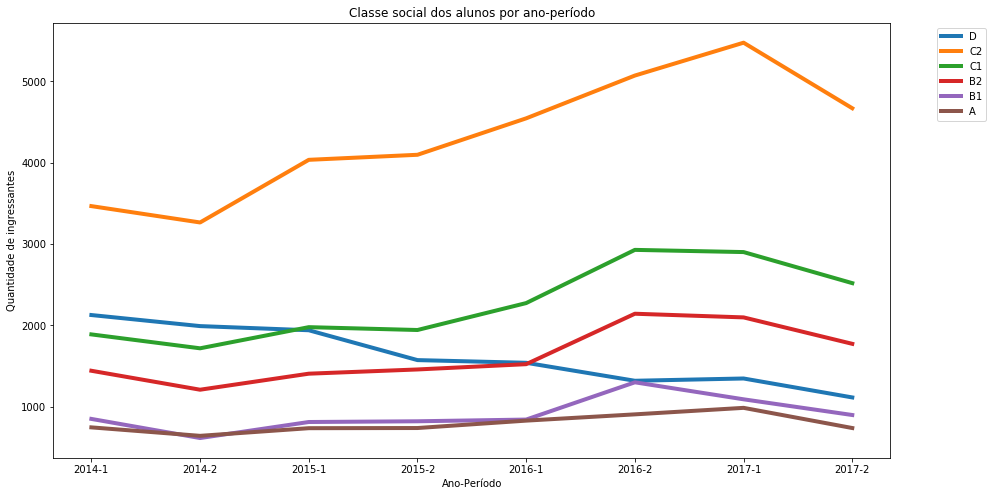

In [7]:
# DataFrame para o gráfico (filtro de 2014 - 2017)
df_graph_classe = dfs['socioeconomicos'][np.logical_and(
    dfs['socioeconomicos']['ano'] > 2013, dfs['socioeconomicos']['ano'] < 2018
)]

# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

# Linhas do gráfico para cada classe
for label in labels:
    classe_count = df_graph_classe[df_graph_classe['classe'] == label].groupby('ano_periodo')['id_discente'].count()
    plt.plot(classe_count.keys(), classe_count.values, label=label, linewidth=4)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Ano-Período')
plt.ylabel('Quantidade de ingressantes')
plt.title('Classe social dos alunos por ano-período')
plt.show()

Através do gráfico mostrado anteriormente, podemos concluir que a UFRN não se encaixa no quadro de 2/3 dos alunos serem da classe D-E, visto que há uma maior quantidade de alunos da classe C2 e C1. Sendo que, para realizarmos uma análise mais profunda, podemos tomar como base a seguinte notícia: ["O futuro não ia ser assim": Pobreza extrema volta a crescer no Brasil](https://brasil.elpais.com/brasil/2018/05/22/politica/1526941832_202640.html). O número de pessoas da classe D-E diminuir e os de C2 e C1 aumentar não significa uma ascensão social de uma classe para outra, podemos dizer que os membros da classe D-E podem não estarem realizando o ENEM para entrar na UFRN, enquanto os membros das classes superiores a C2 e C1 estão caindo de classe, por exemplo na queda da classe B1 no período de 2016-2.

### Análise das bolsas/auxílios
Agora iremos construir 4 gráficos de barra, um para cada bolsa/auxílio que temos registrado, que são:
- Bolsa de Pesquisa
- Auxílio Residência Moradia
- Auxílio Alimentação
- Auxílio Transporte

Funções que iremos utilizar:
- **[plt.bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)**: Cria um gráfico de barra. Primeiro passamos os índices das barras, depois o tamanho (os valores que cada barra terá) e em seguida a largura de cada barra;
  - **alpha**: Define a transparência das barras (`default=None`);
  - **color**: Define a cor das barras;
  - **label**: O rótulo para as barras.
- **[plt.xticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html)**: Definir os locais e rótulos do eixo X.

<Figure size 432x288 with 0 Axes>

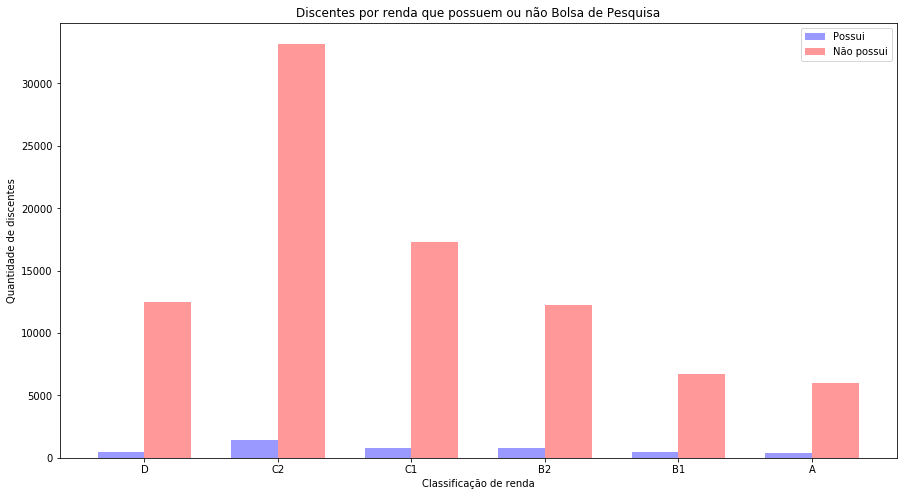

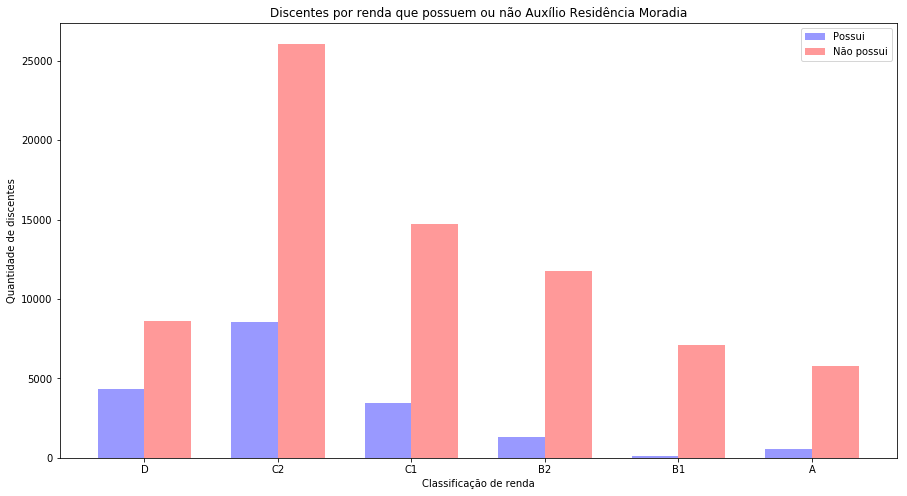

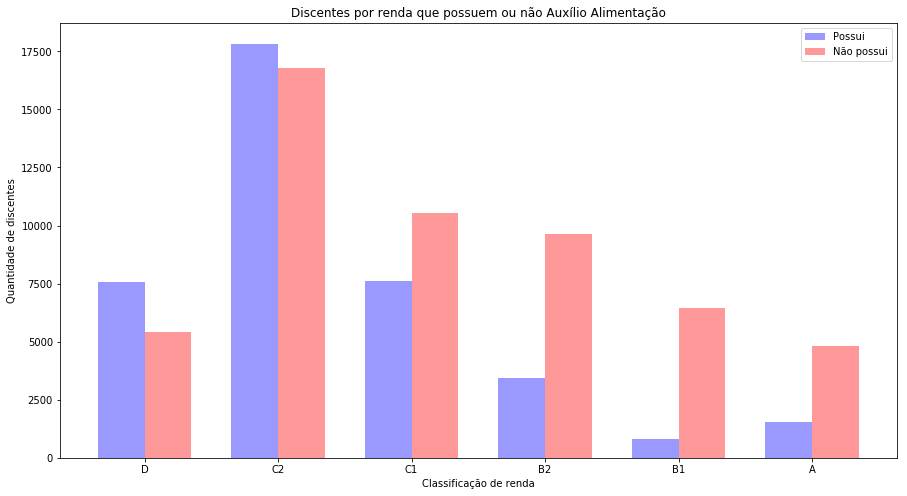

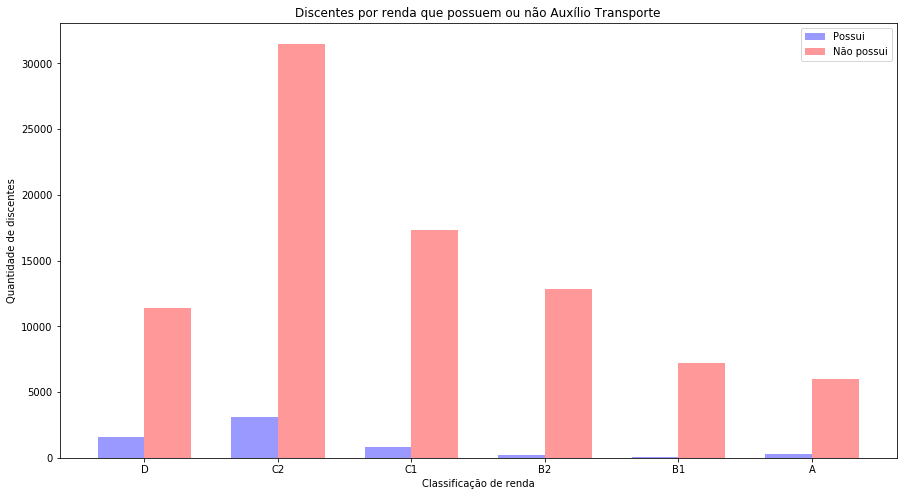

In [8]:
# Índices de barras que teremos no gráfico
index = np.arange(len(labels))
# Tamanho da barra
bar_width = 0.35
# Opacidade
opacity = 0.4

# Auxílios
auxilios = ['possui_bolsa_pesquisa', 'possui_auxilio_residencia_moradia',
            'possui_auxilio_alimentacao', 'possui_auxilio_transporte']
# Títulos do gráfico
title = [ 'Bolsa de Pesquisa', 'Auxílio Residência Moradia', 'Auxílio Alimentação', 'Auxílio Transporte' ]

for i in range(len(auxilios)):
    # Criamos uma nova figura
    fig = plt.figure(i+1)
    
    # Definimos o tamanho da figura que terá o gráfico
    plt.figure(figsize=(15,8))

    # Pegamos a quantidade de discentes por grupo que possuem ou não o auxilio
    classes_auxilios = {
        't': df_graph_classe[
            df_graph_classe[auxilios[i]] == 't'
        ].groupby('classe')['id_discente'].count(),
        'f': df_graph_classe[
            df_graph_classe[auxilios[i]] == 'f'
        ].groupby('classe')['id_discente'].count()
    }

    # Barra dos que possuem o auxílio
    plt.bar(index, classes_auxilios['t'].values, bar_width,
                    alpha=opacity, color='b', label='Possui')

    # Barra dos que não possuem o auxílio
    plt.bar(index + bar_width, classes_auxilios['f'].values, bar_width,
                    alpha=opacity, color='r', label='Não possui')

    # Demais configurações do gráfico
    plt.xlabel('Classificação de renda')
    plt.ylabel('Quantidade de discentes')
    plt.title('Discentes por renda que possuem ou não {}'.format(title[i]))
    plt.xticks(index + bar_width / 2, labels)
    plt.legend()

# Exibimos todos os gráficos de uma só vez
plt.show()

Podemos notar que a classe C2 é quem detêm a maior quantidade de bolsas/auxílios, seguida das classes D e C1 (não obrigatoriamente seguindo essa ordem). Algo que também devemos notar é que os membros da classe A possuem uma maior quantidade de bolsas/auxílios do que os membros da classe B1, o que é errado, visto que, por a classe B1 ser mais baixa que a A financeiramente, eles precisam mais de bolsas/auxílios.

### Alunos que recebem bolsa/auxílios no decorrer dos anos
No decorrer dos anos, a quantidade dos alunos que recebem bolsa/auxílios aumentou ou não?

In [9]:
# Selecionamos as colunas que queremos
dfs['bolsa_auxilios'] = dfs['socioeconomicos'].filter(items=[
    'possui_auxilio_alimentacao', 'possui_auxilio_transporte',
    'possui_auxilio_residencia_moradia', 'possui_bolsa_pesquisa',
    'id_discente', 'ano_periodo'
])
# Imprimimos as primeiras linhas
dfs['bolsa_auxilios'].head()

,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,possui_bolsa_pesquisa,id_discente,ano_periodo
0,t,f,f,f,825312813b1a17de107a020b565b72d0,2015-1
1,f,t,f,f,149560a4d0e7b585febc5a4c2bae1410,2015-1
2,f,f,f,f,909b29d77b69ba8f3eb5f04434845c3e,2015-1
3,t,f,t,f,a975fe54fb5f07a01fad54e3b2e61808,2015-1
4,f,f,f,f,f318ca81231a8e38a11093471e7990ae,2015-1


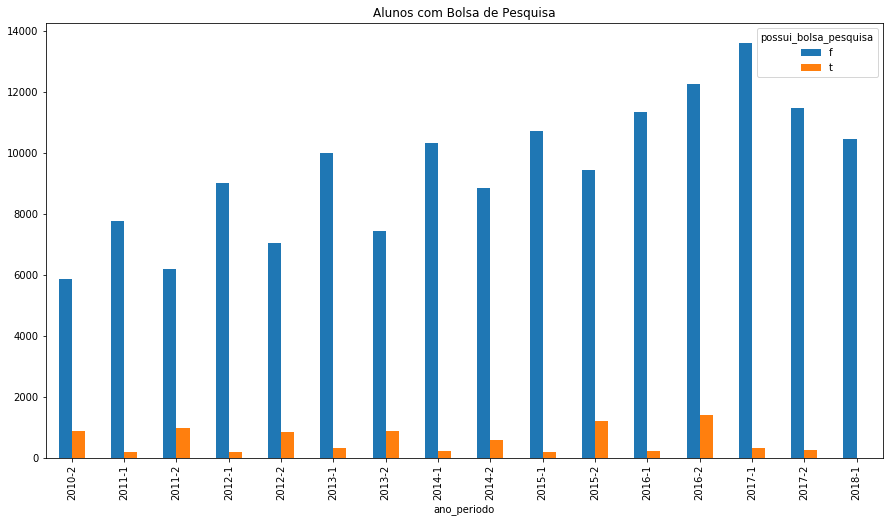

In [10]:
graph_bolsa_pesquisa = dfs['bolsa_auxilios'].filter(items=['possui_bolsa_pesquisa', 'ano_periodo', 'id_discente'])
graph_bolsa_pesquisa = graph_bolsa_pesquisa.rename(index=str,columns={'id_discente':'count'})
graph_bolsa_pesquisa = graph_bolsa_pesquisa.pivot_table(index='ano_periodo', columns='possui_bolsa_pesquisa', aggfunc='count')

# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Alunos com Bolsa de Pesquisa")

# Exibir gráficos
graph_bolsa_pesquisa['count'].plot(kind='bar', ax=ax)

In [11]:
df_merge = pd.merge(dfs['complementares'], dfs['socioeconomicos'], on='id_discente')

# Pega as entradas com data de nascimento preenchidas corretamente
df_merge_filter = df_merge[np.logical_and(
    ~df_merge['data_nascimento'].isnull(),
    df_merge['data_nascimento'].map(
        lambda x: len(str(x)) > 9
    )
)]

# Criamos a coluna ano_nascimento com qual o ano que o individuo nasceu
df_merge_filter['idade_ingresso'] = df_merge_filter['ano_ingresso'] - df_merge_filter['data_nascimento'].map(
    lambda x: int(str(x)[6:])
)

df_merge_filter.head()

/home/alvarofpp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,id_discente,sexo,data_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,...,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,classe,ano_periodo,idade_ingresso
0,a2f469455a1226eca9d652d02ade7e4d,M,03-12-1983,Pardo,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PLANALTO,GRADUAÇÃO,...,1,NaN,NaN,f,f,f,f,NaN,2012-1,18
1,1cc536cdf93a5d423ca2f6da29c75eb5,F,26-01-1977,Pardo,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PITIMBU,GRADUAÇÃO,...,2,NaN,NaN,f,f,f,f,NaN,2010-2,25
2,ebe7eee3d3265baf1cb547335d58a1eb,M,29-11-1980,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PONTA NEGRA,GRADUAÇÃO,...,1,NaN,NaN,f,f,f,f,NaN,2012-1,22
3,ebe7eee3d3265baf1cb547335d58a1eb,M,29-11-1980,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PONTA NEGRA,GRADUAÇÃO,...,2,NaN,NaN,f,f,f,f,NaN,2010-2,22
4,ebe7eee3d3265baf1cb547335d58a1eb,M,29-11-1980,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PONTA NEGRA,GRADUAÇÃO,...,1,NaN,NaN,f,f,f,f,NaN,2011-1,22


In [12]:
# Define some age's intervals
bins = [0, 15, 20, 25, 30, 35, 40, 45, 50, df_merge_filter['idade_ingresso'].max()]

df_merge_filter['intervalo_idade'] = pd.cut(
    df_merge_filter['idade_ingresso'], bins, 
    labels=["< 15", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50 >="], 
    include_lowest=True
)

# Organizando dados para exibir gráficos
df_merge_graph = df_merge_filter[np.logical_and(
    df_merge_filter['ano_ingresso'] >= 2010,
    df_merge_filter['ano_ingresso'] < 2018
)]

# Organizando dados para exibir gráficos
graph_idade_ingresso = df_merge_graph.filter(items=['ano_ingresso', 'intervalo_idade', 'id_discente'])
graph_idade_ingresso = graph_idade_ingresso.rename(index=str,columns={'id_discente':'count'})
graph_idade_ingresso = graph_idade_ingresso.pivot_table(index='ano_ingresso', columns='intervalo_idade', aggfunc='count')

graph_idade_ingresso.head()

/home/alvarofpp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


count                                                 
intervalo_idade  < 15  15-19 20-24 25-29 30-34 35-39 40-44 45-49 50 >=
ano_ingresso                                                          
2010                9  10337  4721  1030   282    88    62    32    14
2011                9  11709  5123  1382   451   185    73    36    31
2012               14  12262  5258  1352   520   182    79    41    24
2013               30  10455  4553  1362   533   187    63    55    19
2014              113  10603  4510  1959   685   264   134    69    57

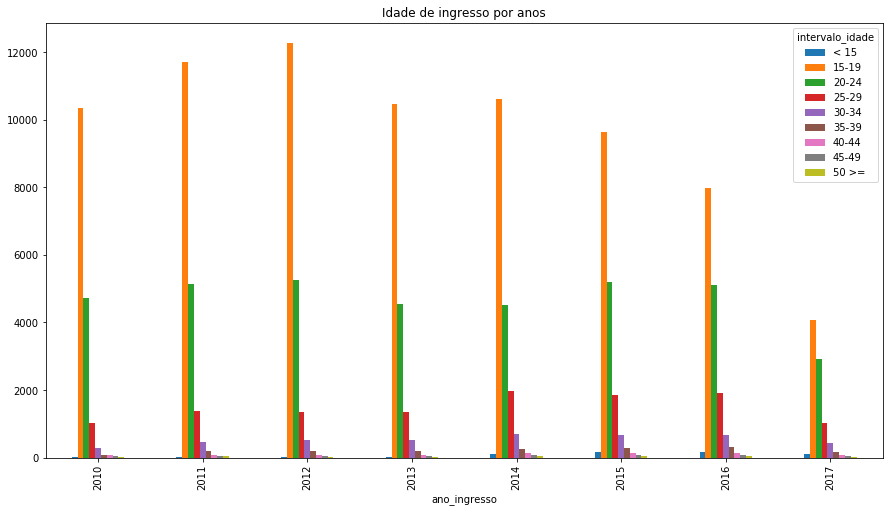

In [13]:
# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Idade de ingresso por anos")

# Exibir gráficos
graph_idade_ingresso['count'].plot(kind='bar', ax=ax)

### Ingressos por áreas de conhecimento
Análise de ingressos por áreas de conhecimento

In [14]:
# Retira os NAN
dfs['cursos_filter'] = dfs['cursos'][~dfs['cursos']['id_curso'].isnull()]
dfs['ingressantes_filter'] = dfs['ingressantes'][~dfs['ingressantes']['id_curso'].isnull()]

# Configura o mesmo tipo para os 'id_curso'
dfs['ingressantes_filter']['id_curso'] = dfs['ingressantes_filter']['id_curso'].astype(int)

# Merge entre as duas tabelas
dfs['merge_curso_ingressantes'] = pd.merge(dfs['ingressantes_filter'], dfs['cursos_filter'], on='id_curso')

/home/alvarofpp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df_merge_ci = dfs['merge_curso_ingressantes']

# Contar ocorrências por área de conhecimento e montar um gráfico
graph_area_conhecimento = df_merge_ci.filter(items=['area_conhecimento','ano_ingresso', 'matricula'])
graph_area_conhecimento = graph_area_conhecimento.rename(index=str,columns={'matricula':'count'})
graph_area_conhecimento = graph_area_conhecimento.pivot_table(index='ano_ingresso', columns='area_conhecimento', aggfunc='count')

graph_area_conhecimento.head()

count                      \
area_conhecimento Ciências Agrárias Ciências Biológicas   
ano_ingresso                                              
2009                           92.0               596.0   
2010                           94.0               596.0   
2012                           74.0               775.0   
2013                           91.0               429.0   
2014                           87.0               485.0   

                                                               \
area_conhecimento Ciências Exatas e da Terra Ciências Humanas   
ano_ingresso                                                    
2009                                  1677.0           1212.0   
2010                                  2669.0           1256.0   
2012                                  2528.0           1358.0   
2013                                  2438.0           1040.0   
2014                                  2631.0           1328.0   

                                                                            \
area_conhecimento Ciências Sociais Aplicadas Ciências da Saúde Engenharias   
ano_ingresso                                                                 
2009                                  1282.0             839.0       732.0   
2010                                  1697.0             914.0       634.0   
2012                                  1437.0            1616.0       674.0   
2013                                  1483.0            1146.0       789.0   
2014                                  1577.0            1153.0       839.0   

                                                     
area_conhecimento Linguística, Letras e Artes Outra  
ano_ingresso                                         
2009                                    310.0   NaN  
2010                                    320.0   NaN  
2012                                   1257.0   NaN  
2013                                    435.0  28.0  
2014                                    865.0  28.0

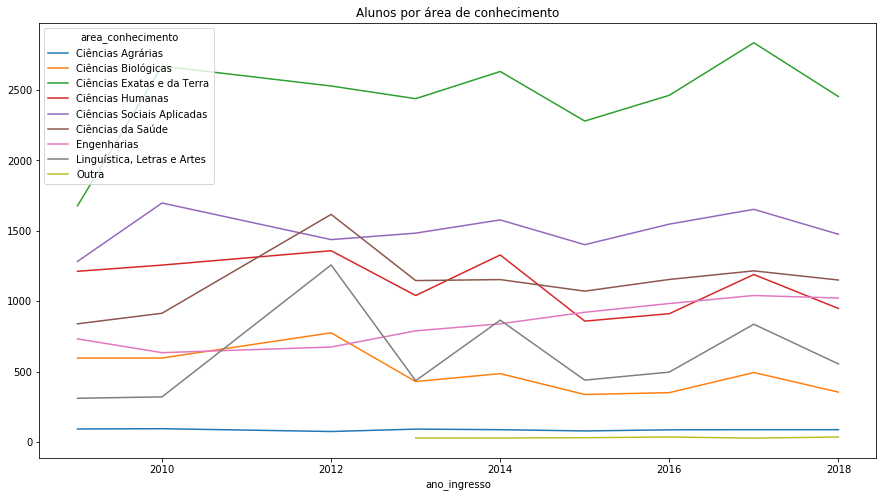

In [16]:
# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Alunos por área de conhecimento")

# Exibir gráficos
graph_area_conhecimento['count'].plot(kind='line', ax=ax)

### Cursos por área de conhecimento
Análise de cursos por área de conhecimento.

In [17]:
#crescimento dos cursos por data de funcionamento

graph_cursos_area_conhecimento = dfs['cursos_filter'].filter(items=['area_conhecimento','data_funcionamento','situacao_curso', 'id_curso'])

# Retira os que não tem data de funcionamento e que são incoerentes
graph_cursos_area_conhecimento = graph_cursos_area_conhecimento[np.logical_and(
    ~graph_cursos_area_conhecimento['data_funcionamento'].isnull(),
    graph_cursos_area_conhecimento['data_funcionamento'].map(
        lambda x: len(str(x)) > 9
    )
)]

# Transforma data de funcionamento para ano_fundacao
graph_cursos_area_conhecimento['ano_fundacao'] = graph_cursos_area_conhecimento['data_funcionamento'].map(
    lambda x: int(str(x)[0:4])
)
# Retira os desativos
graph_cursos_area_conhecimento = graph_cursos_area_conhecimento[graph_cursos_area_conhecimento['situacao_curso'].map(
    lambda x: x == "ATIVO"
)]

graph_cursos_area_conhecimento.head()

,area_conhecimento,data_funcionamento,situacao_curso,id_curso,ano_fundacao
0,Ciências Sociais Aplicadas,1971-09-16,ATIVO,2000002,1971
3,Engenharias,1973-08-13,ATIVO,2000005,1973
4,"Linguística, Letras e Artes",1977-03-03,ATIVO,2000123,1977
5,Ciências Sociais Aplicadas,1977-03-03,ATIVO,2000006,1977
6,Ciências Biológicas,2003-03-31,ATIVO,2000122,2003


In [18]:
bins = [graph_cursos_area_conhecimento['ano_fundacao'].min(), 1933, 1943, 1953, 1963, 1973, 1983, 1993, 2003, 2013, 2023]

graph_cursos_area_conhecimento['intervalo_fundacao'] = pd.cut(
    graph_cursos_area_conhecimento['ano_fundacao'], bins, 
    labels=["< 1933", "1933-1943", "1943-1953", "1953-1963", "1963-1973", "1973-1983", "1983-1993", "1993-2003", "2003-2013", "2013-2023"], 
    include_lowest=True
)

# Contar ocorrências por área de conhecimento e montar um gráfico
graph_cac = graph_cursos_area_conhecimento.filter(items=['area_conhecimento','intervalo_fundacao', 'id_curso'])
graph_cac = graph_cac.rename(index=str,columns={'id_curso':'count'})
graph_cac = graph_cac.pivot_table(index='intervalo_fundacao', columns='area_conhecimento', aggfunc='count')

graph_cac.head()

count                             \
area_conhecimento  Ciências Biológicas Ciências Exatas e da Terra   
intervalo_fundacao                                                  
< 1933                             NaN                        NaN   
1943-1953                          NaN                        NaN   
1953-1963                          NaN                        2.0   
1963-1973                          2.0                        7.0   
1973-1983                          NaN                        3.0   

                                                                \
area_conhecimento  Ciências Humanas Ciências Sociais Aplicadas   
intervalo_fundacao                                               
< 1933                          NaN                        NaN   
1943-1953                       NaN                        1.0   
1953-1963                       3.0                        2.0   
1963-1973                       NaN                        2.0   
1973-1983                       6.0                        4.0   

                                                                              
area_conhecimento  Ciências da Saúde Engenharias Linguística, Letras e Artes  
intervalo_fundacao                                                            
< 1933                           1.0         NaN                         NaN  
1943-1953                        1.0         NaN                         NaN  
1953-1963                        1.0         1.0                         NaN  
1963-1973                        2.0         2.0                         NaN  
1973-1983                        3.0         2.0                         3.0

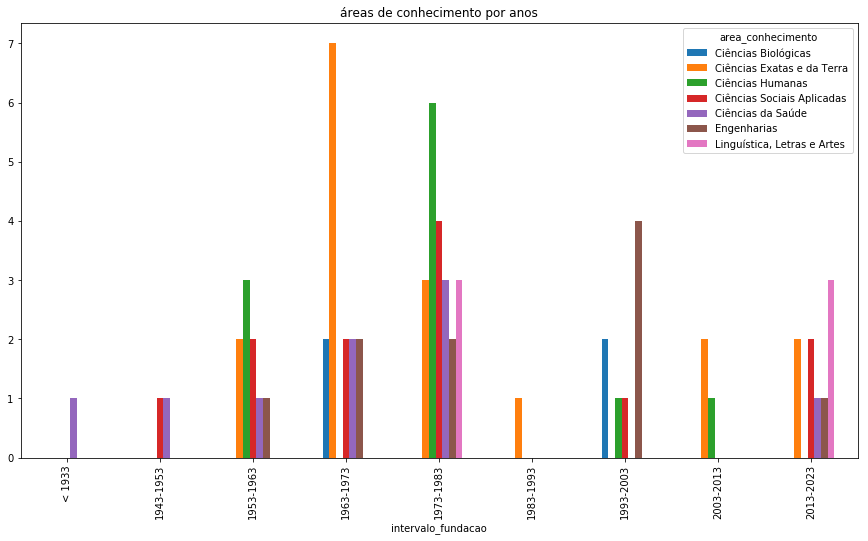

In [19]:
# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("áreas de conhecimento por anos")

# Exibir gráficos
graph_cac['count'].plot(kind='bar', ax=ax)